In [1]:
source('./ABCA7lof2/plotting.r')
library(ggplot2)
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [2]:
data = read.csv('./processed_data/choline_lipidomics/5041.SUB14737_LipidXData.csv')
data$class = as.character(data$class)

data$avg_chain_length <- sapply(strsplit(gsub("[()]", "", data$fattyacid), "_"), function(x) {
    chains <- sapply(strsplit(x, ":"), `[`, 1)
    if (length(chains) == 1) {
        sum(as.numeric(chains)) / 3
    } else {
        mean(as.numeric(chains))
    }
})
data$total_chain_length <- sapply(strsplit(gsub("[()]", "", data$fattyacid), "_"), function(x) {
    chains <- sapply(strsplit(x, ":"), `[`, 1)
    chains <- gsub("^d", "", chains)
    sum(as.numeric(chains))
})

data$total_unsaturation <- sapply(strsplit(gsub("[()]", "", data$fattyacid), "_"), function(x) {
    unsaturations <- sapply(strsplit(x, ":"), `[`, 2)
    sum(as.numeric(unsaturations))
})

library(ggsci)

key = read.csv('../ABCA7lof//raw_data/ngn2_data/lipidkey.csv', sep = '\t')
key = key[!duplicated(key$Key),]
rownames(key) = key$Key

data$Class = as.character(key[data$class,'Class'])

Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coe

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message i

In [3]:
data$name = paste(data$class, data$total_chain_length, ':', data$total_unsaturation)

In [5]:
names(data)


[1] "name"                    "ret_time"               
  [3] "rej."                    "lipidion"               
  [5] "lipidgroup"              "class"                  
  [7] "fattyacid"               "fa1"                    
  [9] "fa2"                     "fa3"                    
 [11] "calcmz"                  "ionformula"             
 [13] "grouparea.c."            "grouparea.s1."          
 [15] "grouparea.s2."           "grouparea.s3."          
 [17] "grouptoppos.c."          "grouptoppos.s1."        
 [19] "grouptoppos.s2."         "grouptoppos.s3."        
 [21] "arearsd.c."              "arearsd.s1."            
 [23] "arearsd.s2."             "arearsd.s3."            
 [25] "grouppq.c."              "grouppq.s1."            
 [27] "grouppq.s2."             "grouppq.s3."            
 [29] "groups.n.c."             "groups.n.s1."           
 [31] "groups.n.s2."            "groups.n.s3."           
 [33] "area.s1.1."              "area.s1.2."             
 [35] "area.s1.3."              "area.s1.4."             
 [37] "area.s1.5."              "area.s2.1."             
 [39] "area.s2.2."              "area.s2.3."             
 [41] "area.s2.4."              "area.s2.5."             
 [43] "area.s3.1."              "toppos.c.1."            
 [45] "toppos.s1.1."            "toppos.s1.2."           
 [47] "toppos.s1.3."            "toppos.s1.4."           
 [49] "toppos.s1.5."            "toppos.s2.1."           
 [51] "toppos.s2.2."            "toppos.s2.3."           
 [53] "toppos.s2.4."            "toppos.s2.5."           
 [55] "toppos.s3.1."            "obsmz.c.1."             
 [57] "obsmz.s1.1."             "obsmz.s1.2."            
 [59] "obsmz.s1.3."             "obsmz.s1.4."            
 [61] "obsmz.s1.5."             "obsmz.s2.1."            
 [63] "obsmz.s2.2."             "obsmz.s2.3."            
 [65] "obsmz.s2.4."             "obsmz.s2.5."            
 [67] "obsmz.s3.1."             "rt.c.1."                
 [69] "rt.s1.1."                "rt.s1.2."               
 [71] "rt.s1.3."                "rt.s1.4."               
 [73] "rt.s1.5."                "rt.s2.1."               
 [75] "rt.s2.2."                "rt.s2.3."               
 [77] "rt.s2.4."                "rt.s2.5."               
 [79] "rt.s3.1."                "delta.ppm..c.1."        
 [81] "delta.ppm..s1.1."        "delta.ppm..s1.2."       
 [83] "delta.ppm..s1.3."        "delta.ppm..s1.4."       
 [85] "delta.ppm..s1.5."        "delta.ppm..s2.1."       
 [87] "delta.ppm..s2.2."        "delta.ppm..s2.3."       
 [89] "delta.ppm..s2.4."        "delta.ppm..s2.5."       
 [91] "delta.ppm..s3.1."        "grade.c.1."             
 [93] "grade.s1.1."             "grade.s1.2."            
 [95] "grade.s1.3."             "grade.s1.4."            
 [97] "grade.s1.5."             "grade.s2.1."            
 [99] "grade.s2.2."             "grade.s2.3."            
[101] "grade.s2.4."             "grade.s2.5."            
[103] "grade.s3.1."             "pq.c.1."                
[105] "pq.s1.1."                "pq.s1.2."               
[107] "pq.s1.3."                "pq.s1.4."               
[109] "pq.s1.5."                "pq.s2.1."               
[111] "pq.s2.2."                "pq.s2.3."               
[113] "pq.s2.4."                "pq.s2.5."               
[115] "pq.s3.1."                "s.n.c.1."               
[117] "s.n.s1.1."               "s.n.s1.2."              
[119] "s.n.s1.3."               "s.n.s1.4."              
[121] "s.n.s1.5."               "s.n.s2.1."              
[123] "s.n.s2.2."               "s.n.s2.3."              
[125] "s.n.s2.4."               "s.n.s2.5."              
[127] "s.n.s3.1."               "intensityratio.c.1."    
[129] "intensityratio.s1.1."    "intensityratio.s1.2."   
[131] "intensityratio.s1.3."    "intensityratio.s1.4."   
[133] "intensityratio.s1.5."    "intensityratio.s2.1."   
[135] "intensityratio.s2.2."    "intensityratio.s2.3."   
[137] "intensityratio.s2.4."    "intensityratio.s2.5."   


Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_text_repel()`)."Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_point()`)."Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_text_repel()`)."Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_point()`)."

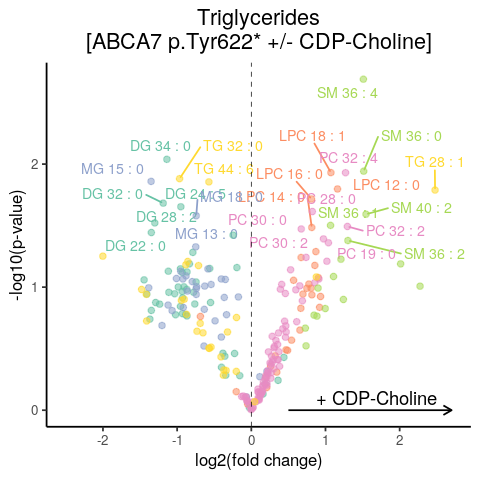

In [24]:
plot_volcano = function(sce, ratio_name, pval_name, lab, pval_cut, lfc_cut, adjust, annotation1, class_cols, total_chain_length_name, label_name){
    temp = as.data.frame(sce[,c(ratio_name, pval_name, annotation1, total_chain_length_name, label_name)])
    colnames(temp) = c('log2', 'pvalue', 'label', 'total_chain_length', 'label_name')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label_name,'')
    
    # Color points and text by label_name using npg color palette
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=label, label=label2)) +
        geom_text_repel(max.overlaps = Inf, size = 3) +
        geom_point(aes(alpha = 0.01), show.legend = FALSE) +
        scale_color_brewer(palette = "Set2") +  # Use a different color palette
        theme_classic() +
        theme(
            text = element_text(size=10),
            strip.background = element_blank(),
            strip.placement = "outside",
            strip.text.y = element_text(size = 10, color = "black"),
            legend.position='none'
        )
    return(p + xlab('log2(fold change)') + ylab('-log10(p-value)'))
}

options(repr.plot.width = 4, repr.plot.height = 4)  # Change figure size to 10x5
# Save the plot as a PNG file

plot_volcano(data[as.character(data$class)%in%c('TG', 'PC', 'MG', 'DG', 'LPC', 'SM'),], 'log_ratio.s2.over.s1.', 'p_value.s2.over.s1.', c('TG', 'PC', 'MG', 'DG', 'LPC', 'SM'), 0.05, .5, FALSE, 'class', c('chocolate'), 'total_unsaturation', 'name')+
ggtitle('Triglycerides\n[ABCA7 p.Tyr622* +/- CDP-Choline]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed', size=.2)  +
annotate("segment", x = 0.5, xend = 2.7, y = 0, yend = 0, arrow = arrow(length = unit(0.2, "cm"))) +
annotate("text", x = 2.5, y = 0.1, label = "+ CDP-Choline", hjust = 1) + xlim(-2.5,2.7)
ggsave("./pdf_figures/volcano_plot_cdp_choline.png", plot = last_plot(), device = "png", width = 4, height = 4)



In [39]:
# same for TG up vs down of G2 vs E3
data = readRDS('../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
data = rowData(data$ngn2_all)

data$class = as.character(data$lipid.class)

data$avg_chain_length <- sapply(strsplit(gsub("[()]", "", data$lipid.fattyacid), "_"), function(x) {
    chains <- sapply(strsplit(x, ":"), `[`, 1)
    if (length(chains) == 1) {
        sum(as.numeric(chains)) / 3
    } else {
        mean(as.numeric(chains))
    }
})
data$total_chain_length <- sapply(strsplit(gsub("[()]", "", data$lipid.fattyacid), "_"), function(x) {
    chains <- sapply(strsplit(x, ":"), `[`, 1)
    chains <- gsub("^d", "", chains)
    sum(as.numeric(chains))
})

data$total_unsaturation <- sapply(strsplit(gsub("[()]", "", data$lipid.fattyacid), "_"), function(x) {
    unsaturations <- sapply(strsplit(x, ":"), `[`, 2)
    sum(as.numeric(unsaturations))
})

library(ggsci)

key = read.csv('../ABCA7lof//raw_data/ngn2_data/lipidkey.csv', sep = '\t')
key = key[!duplicated(key$Key),]
rownames(key) = key$Key

data$Class = as.character(key[data$class,'Class'])

Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs i

In [46]:
data$name = paste(data$class, data$total_chain_length, ':', data$total_unsaturation)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`)."Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."

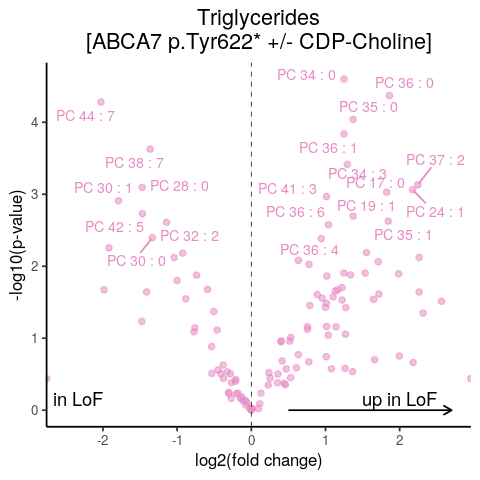

In [67]:
plot_volcano = function(sce, ratio_name, pval_name, lab, pval_cut, lfc_cut, adjust, annotation1, class_cols, total_chain_length_name, label_name){
    temp = as.data.frame(sce[,c(ratio_name, pval_name, annotation1, total_chain_length_name, label_name)])
    colnames(temp) = c('log2', 'pvalue', 'label', 'total_chain_length', 'label_name')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label_name,'')
    
    # Color points and text by label_name using npg color palette
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=label, label=label2)) +
        geom_text_repel(max.overlaps = Inf, size = 3) +
        geom_point(aes(alpha = 0.01), show.legend = FALSE) +
            # Start of Selection
            scale_color_manual(values = "#E78AC3") +  # Set color to pink from Set2 palette
        theme_classic() +
        theme(
            text = element_text(size=10),
            strip.background = element_blank(),
            strip.placement = "outside",
            strip.text.y = element_text(size = 10, color = "black"),
            legend.position='none'
        )
    return(p + xlab('log2(fold change)') + ylab('-log10(p-value)'))
}

options(repr.plot.width = 4, repr.plot.height = 4)  # Change figure size to 10x5
# Save the plot as a PNG file

plot_volcano(data[as.character(data$class)%in%c('PC'),], 'logfc_both_batch', 'pvals_both_batch', c('PC'), 0.005, 0.5, FALSE, 'class', c('chocolate'), 'total_unsaturation', 'name')+
ggtitle('Triglycerides\n[ABCA7 p.Tyr622* +/- CDP-Choline]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed', size=.2)  +
annotate("segment", x = 0.5, xend = 2.7, y = 0, yend = 0, arrow = arrow(length = unit(0.2, "cm"))) +
annotate("text", x = 2.5, y = 0.15, label = "up in LoF", hjust = 1) + xlim(-2.5,2.7) 
ggsave("./pdf_figures/volcano_PCs.png", plot = last_plot(), device = "png", width = 4, height = 4)



In [ ]:
data$pvals_both_batch

Warning message in cor.test.default(x$total_unsaturation, x$score, method = "spearman"):
"Cannot compute exact p-value with ties"Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's colour values."

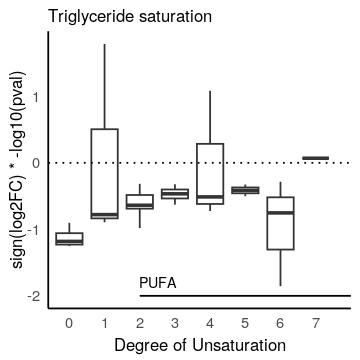

In [17]:
options(repr.plot.width = 3, repr.plot.height = 3)

x = data 
x = x[x$class == 'TG',]
x$score = sign(x$log_ratio.s2.over.s1.) * -log10(x$p_value.s2.over.s1.)
# Compute Spearman correlation between total_unsaturation and score_both_batch
x$logfc = x$log_ratio.s2.over.s1.
x$pval = x$p_value.s2.over.s1.

result <- cor.test(x$total_unsaturation, x$score, method = "spearman")
# Add p-value and rho to the plot
p_value <- result$p.value
rho <- result$estimate

# Plot boxplot of sign(logFC both batch) * -log10(pval both batch) against total unsaturation
ggplot(x, aes(x = as.factor(total_unsaturation), y = score)) +
  geom_boxplot(outlier.shape = NA) +
  scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
  labs(x = "Degree of Unsaturation", y = "sign(log2FC) * -log10(pval)", title = "Triglyceride saturation") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    plot.title = element_text(size = 10),  # Change title font size
    axis.title.x = element_text(size = 10),  # Change x label font size
    axis.title.y = element_text(size = 10)   # Change y label font size
  ) + #geom_point(aes(alpha = 0.01), show.legend = FALSE) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  annotate("segment", x = 3, xend = 9, y = -2, yend = -2,  color = "black") +  # Add right arrow
  annotate("text", x = 3.5, y = -1.8, label = "PUFA", color = "black", size = 3)  # Add horizontal dotted line at zero
#ggsave("./pdf_figures/triglycerides_saturation.pdf", plot = last_plot(), device = "pdf", width = 3, height = 3)
#ggsave("./pdf_figures/triglycerides_saturation_choline.png", plot = last_plot(), device = "png", width = 3, height = 3)

# Add right arrow annotation to the plot




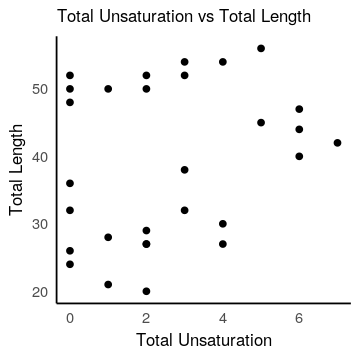

In [18]:
# Plot total unsaturation vs total length, color points by score
ggplot(x, aes(x = total_unsaturation, y = total_chain_length)) +
  geom_point() +
  scale_color_gradient(low = "white", high = "red") +  # Change color scheme to white-red
  labs(x = "Total Unsaturation", y = "Total Length", title = "Total Unsaturation vs Total Length", color = "Score") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    plot.title = element_text(size = 10),  # Change title font size
    axis.title.x = element_text(size = 10),  # Change x label font size
    axis.title.y = element_text(size = 10)   # Change y label font size
  )

Warning message in cor.test.default(x$total_unsaturation, x$score, method = "spearman"):
"Cannot compute exact p-value with ties"Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's colour values."

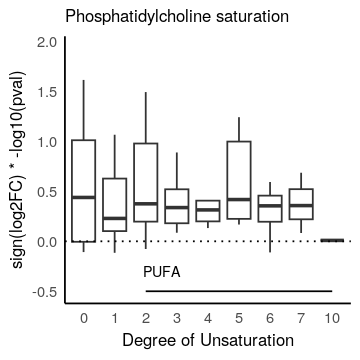

In [11]:
options(repr.plot.width = 3, repr.plot.height = 3)

x = data 
x = x[x$class == 'PC',]
x$score = sign(x$log_ratio.s2.over.s1.) * -log10(x$p_value.s2.over.s1.)
# Compute Spearman correlation between total_unsaturation and score_both_batch
x$logfc = x$log_ratio.s2.over.s1.
x$pval = x$p_value.s2.over.s1.

result <- cor.test(x$total_unsaturation, x$score, method = "spearman")
# Add p-value and rho to the plot
p_value <- result$p.value
rho <- result$estimate

# Plot boxplot of sign(logFC both batch) * -log10(pval both batch) against total unsaturation
ggplot(x, aes(x = as.factor(total_unsaturation), y = score)) +
  geom_boxplot(outlier.shape = NA) +
  scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
  labs(x = "Degree of Unsaturation", y = "sign(log2FC) * -log10(pval)", title = "Phosphatidylcholine saturation") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    plot.title = element_text(size = 10),  # Change title font size
    axis.title.x = element_text(size = 10),  # Change x label font size
    axis.title.y = element_text(size = 10)   # Change y label font size
  ) +
  # geom_jitter(x,
  #   data = filter(x, abs(logfc)>1),  # Filter data for TRUE annotations
  #   width = 0.2,                            # Horizontal jitter
  #   size = 1,                               # Increased size for visibility
  #   alpha = 0.7,                            # Slightly higher opacity
  #   color = "red"                           # Color for annotated points
  # ) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black") +
  annotate("segment", x = 3, xend = 9, y = -0.5, yend = -0.5,  color = "black") +  # Add right arrow
  annotate("text", x = 3.5, y = -.3, label = "PUFA", color = "black", size = 3)  # Add horizontal dotted line at zero
#ggsave("./pdf_figures/triglycerides_saturation.pdf", plot = last_plot(), device = "pdf", width = 3, height = 3)
#ggsave("./pdf_figures/phospholipids_saturation_choline.png", plot = last_plot(), device = "png", width = 3, height = 3)

# Add right arrow annotation to the plot




Warning message in cor.test.default(x$total_unsaturation, x$score, method = "spearman"):
"Cannot compute exact p-value with ties"

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."

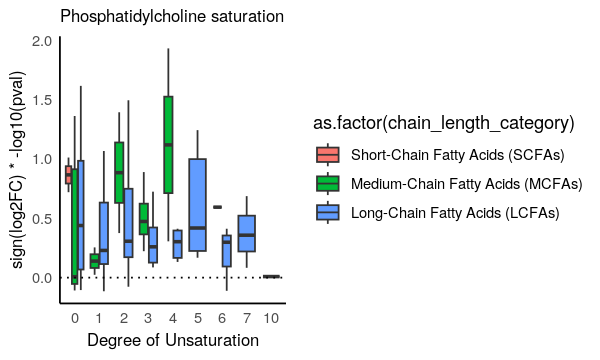

In [27]:
options(repr.plot.width = 5, repr.plot.height = 3)

x = data 
x = x[x$class%in%c('PC'),]
x$score = sign(x$log_ratio.s2.over.s1.) * -log10(x$p_value.s2.over.s1.)
# Compute Spearman correlation between total_unsaturation and score_both_batch
x$logfc = x$log_ratio.s2.over.s1.
x$pval = x$p_value.s2.over.s1.

result <- cor.test(x$total_unsaturation, x$score, method = "spearman")
# Add p-value and rho to the plot
p_value <- result$p.value
rho <- result$estimate
# Create a binned column according to avg_chain_length
x$chain_length_category <- cut(x$avg_chain_length,
                               breaks = c(-Inf, 6, 12, 21, Inf),
                               labels = c("Short-Chain Fatty Acids (SCFAs)",
                                          "Medium-Chain Fatty Acids (MCFAs)",
                                          "Long-Chain Fatty Acids (LCFAs)",
                                          "Very Long-Chain Fatty Acids (VLCFAs)"))

# Add comments to explain the binning process
# -Inf to 6: Short-Chain Fatty Acids (SCFAs)
# 7 to 12: Medium-Chain Fatty Acids (MCFAs)
# 13 to 21: Long-Chain Fatty Acids (LCFAs)
# 22 and above: Very Long-Chain Fatty Acids (VLCFAs)

# Plot boxplot of sign(logFC both batch) * -log10(pval both batch) against total unsaturation
ggplot(x, aes(x = as.factor(total_unsaturation), y = score)) +
  geom_boxplot(outlier.shape = NA, aes(fill=as.factor(chain_length_category))) +
  scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
  labs(x = "Degree of Unsaturation", y = "sign(log2FC) * -log10(pval)", title = "Phosphatidylcholine saturation") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    plot.title = element_text(size = 10),  # Change title font size
    axis.title.x = element_text(size = 10),  # Change x label font size
    axis.title.y = element_text(size = 10)   # Change y label font size
  ) +
  # geom_jitter(x,
  #   data = filter(x, abs(logfc)>1),  # Filter data for TRUE annotations
  #   width = 0.2,                            # Horizontal jitter
  #   size = 1,                               # Increased size for visibility
  #   alpha = 0.7,                            # Slightly higher opacity
  #   color = "red"                           # Color for annotated points
  # ) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black")# Add horizontal dotted line at zero
#ggsave("./pdf_figures/triglycerides_saturation.pdf", plot = last_plot(), device = "pdf", width = 3, height = 3)
#ggsave("./pdf_figures/phospholipids_saturation_choline.png", plot = last_plot(), device = "png", width = 3, height = 3)

# Add right arrow annotation to the plot




In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)

x = data 
x = x[x$class%in%c('PC'),]
x$score = sign(x$log_ratio.s2.over.s1.) * -log10(x$p_value.s2.over.s1.)
# Compute Spearman correlation between total_unsaturation and score_both_batch
x$logfc = x$log_ratio.s2.over.s1.
x$pval = x$p_value.s2.over.s1.

result <- cor.test(x$total_unsaturation, x$score, method = "spearman")
# Add p-value and rho to the plot
p_value <- result$p.value
rho <- result$estimate
# Create a binned column according to avg_chain_length
x$chain_length_category <- cut(x$avg_chain_length,
                               breaks = c(-Inf, 6, 12, 21, Inf),
                               labels = c("Short-Chain Fatty Acids (SCFAs)",
                                          "Medium-Chain Fatty Acids (MCFAs)",
                                          "Long-Chain Fatty Acids (LCFAs)",
                                          "Very Long-Chain Fatty Acids (VLCFAs)"))

# Add comments to explain the binning process
# -Inf to 6: Short-Chain Fatty Acids (SCFAs)
# 7 to 12: Medium-Chain Fatty Acids (MCFAs)
# 13 to 21: Long-Chain Fatty Acids (LCFAs)
# 22 and above: Very Long-Chain Fatty Acids (VLCFAs)

# Plot boxplot of sign(logFC both batch) * -log10(pval both batch) against total unsaturation
ggplot(x, aes(x = as.factor(total_unsaturation), y = score)) +
  geom_boxplot(outlier.shape = NA, aes(fill=as.factor(chain_length_category))) +
  scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
  labs(x = "Degree of Unsaturation", y = "sign(log2FC) * -log10(pval)", title = "Phosphatidylcholine saturation") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    plot.title = element_text(size = 10),  # Change title font size
    axis.title.x = element_text(size = 10),  # Change x label font size
    axis.title.y = element_text(size = 10)   # Change y label font size
  ) +
  # geom_jitter(x,
  #   data = filter(x, abs(logfc)>1),  # Filter data for TRUE annotations
  #   width = 0.2,                            # Horizontal jitter
  #   size = 1,                               # Increased size for visibility
  #   alpha = 0.7,                            # Slightly higher opacity
  #   color = "red"                           # Color for annotated points
  # ) +
  geom_hline(yintercept = 0, linetype = "dotted", color = "black")# Add horizontal dotted line at zero
#ggsave("./pdf_figures/triglycerides_saturation.pdf", plot = last_plot(), device = "pdf", width = 3, height = 3)
#ggsave("./pdf_figures/phospholipids_saturation_choline.png", plot = last_plot(), device = "png", width = 3, height = 3)

# Add right arrow annotation to the plot




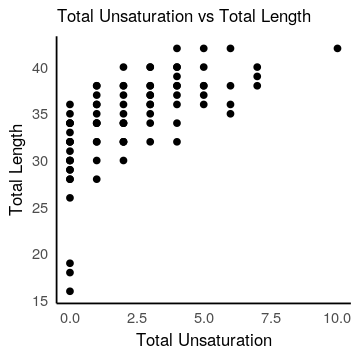

In [15]:
# Plot total unsaturation vs total length, color points by score
ggplot(x, aes(x = total_unsaturation, y = total_chain_length)) +
  geom_point() +
  scale_color_gradient(low = "white", high = "red") +  # Change color scheme to white-red
  labs(x = "Total Unsaturation", y = "Total Length", title = "Total Unsaturation vs Total Length", color = "Score") +
  theme_minimal() +
  theme(
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    plot.title = element_text(size = 10),  # Change title font size
    axis.title.x = element_text(size = 10),  # Change x label font size
    axis.title.y = element_text(size = 10)   # Change y label font size
  )

In [28]:
data$combined_class = paste(data$class, data$total_chain_length, sep='_')
data$combined_class2 = paste(data$class,data$total_unsaturation, sep=':')

In [36]:
data[data$class=='TG' & data$p_value.s2.over.s1.<0.05,]

,name,ret_time,rej.,lipidion,lipidgroup,class,fattyacid,fa1,fa2,fa3,⋯,ratio.s2.over.s1.,log_ratio.s2.over.s1.,p_value.s2.over.s1.,log_p_value.s2.over.s1.,avg_chain_length,total_chain_length,total_unsaturation,Class,combined_class,combined_class2
,<fct>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
314,TG(16:1_6:0_6:0)+Na_40.12,40.12,0,TG(16:1_6:0_6:0)+Na,TG(28:1)+Na,TG,(16:1_6:0_6:0),(16:1),(6:0),(6:0),⋯,5.5689535,2.4774062,0.01626652,1.788705,9.333333,28,1,Neutral lipids,TG_28,TG:1
320,TG(20:0e_6:0_6:0)+Na_45.81,45.81,0,TG(20:0e_6:0_6:0)+Na,TG(32:0e)+Na,TG,(20:0e_6:0_6:0),(20:0e),(6:0),(6:0),⋯,0.5115526,-0.9670455,0.01313662,1.881516,10.666667,32,0,Neutral lipids,TG_32,TG:0
326,TG(44:6e)+NH4_34.11,34.11,0,TG(44:6e)+NH4,TG(44:6e)+NH4,TG,(44:6e),(44:6e),,,⋯,0.6726527,-0.5720663,0.01395329,1.855323,14.666667,44,6,Neutral lipids,TG_44,TG:6


Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_text_repel()`)."Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."

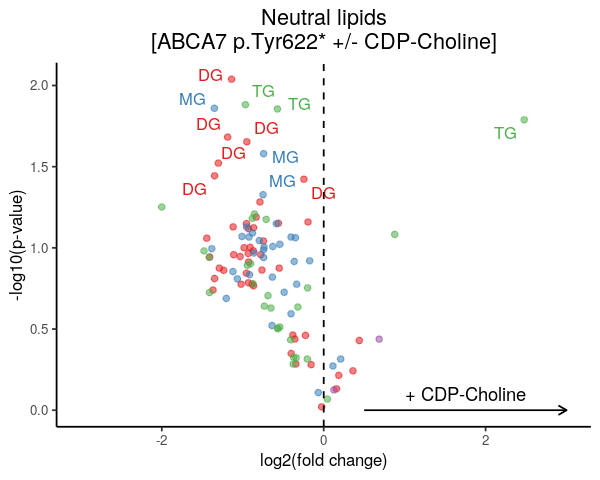

In [16]:
plot_volcano = function(sce, ratio_name, pval_name, lab, pval_cut, lfc_cut, adjust, annotation1, class_cols, total_chain_length_name, label_name){
    temp = as.data.frame(sce[,c(ratio_name, pval_name, annotation1, total_chain_length_name, label_name)])
    colnames(temp) = c('log2', 'pvalue', 'label', 'total_chain_length', 'label_name')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label_name,'')
    
    # Color points and text by label_name using npg color palette
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=label_name, label=label2)) +
        geom_text_repel(max.overlaps = Inf, size = 3.5) +
        geom_point(aes(alpha = 0.01), show.legend = FALSE) +
        scale_color_brewer(palette = "Set1") +  # Use a different color palette
        theme_classic() +
        theme(
            text = element_text(size=10),
            strip.background = element_blank(),
            strip.placement = "outside",
            strip.text.y = element_text(size = 10, color = "black"),
            legend.position='none'
        )
    return(p + xlab('log2(fold change)') + ylab('-log10(p-value)'))
}

options(repr.plot.width = 5, repr.plot.height = 4)  # Change figure size to 10x5
# Save the plot as a PNG file

plot_volcano(data[as.character(data$Class)%in%c('Neutral lipids'),], 'log_ratio.s2.over.s1.', 'p_value.s2.over.s1.', c('DG', 'TG', 'MG'), 0.05, 0, FALSE, 'class', c('chocolate'), 'total_unsaturation', 'class')+
ggtitle('Neutral lipids\n[ABCA7 p.Tyr622* +/- CDP-Choline]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed') + xlim(-3,3) +
annotate("segment", x = 0.5, xend = 3, y = 0, yend = 0, arrow = arrow(length = unit(0.2, "cm"))) +
annotate("text", x = 2.5, y = 0.1, label = "+ CDP-Choline", hjust = 1)
#ggsave("../../pdf_figures/volcano_plot.png", plot = last_plot(), device = "png", width = 5, height = 4)



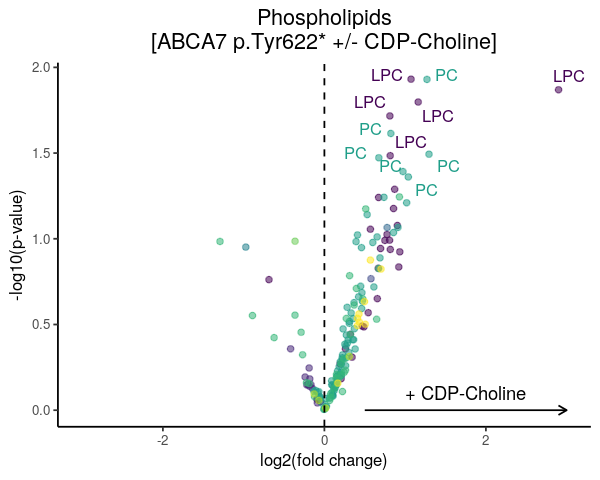

In [4]:
plot_volcano = function(sce, ratio_name, pval_name, lab, pval_cut, lfc_cut, adjust, annotation1, class_cols, total_chain_length_name, label_name){
    temp = as.data.frame(sce[,c(ratio_name, pval_name, annotation1, total_chain_length_name, label_name)])
    colnames(temp) = c('log2', 'pvalue', 'label', 'total_chain_length', 'label_name')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label_name,'')
    
    # Color points and text by label_name using npg color palette
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=label_name, label=label2)) +
        geom_text_repel(max.overlaps = Inf, size = 3.5) +
        geom_point(aes(alpha = 0.01), show.legend = FALSE) +
        scale_color_viridis_d() +  # Use viridis color palette
        theme_classic() +
        theme(
            text = element_text(size=10),
            strip.background = element_blank(),
            strip.placement = "outside",
            strip.text.y = element_text(size = 10, color = "black"),
            legend.position='none'
        )
    return(p + xlab('log2(fold change)') + ylab('-log10(p-value)'))
}

options(repr.plot.width = 5, repr.plot.height = 4)  # Change figure size to 10x5

plot_volcano(data[as.character(data$Class)%in%c('Phospholipids'),], 'log_ratio.s2.over.s1.', 'p_value.s2.over.s1.', c('PC', 'LPC', 'SM', 'PE'), 0.05, 0, FALSE, 'class', c('chocolate'), 'total_chain_length', 'class')+
ggtitle('Phospholipids\n[ABCA7 p.Tyr622* +/- CDP-Choline]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed') + xlim(-3,3) +
annotate("segment", x = 0.5, xend = 3, y = 0, yend = 0, arrow = arrow(length = unit(0.2, "cm"))) +
annotate("text", x = 2.5, y = 0.1, label = "+ CDP-Choline", hjust = 1)
ggsave("../../pdf_figures/volcano_plot_phospholipids.png", plot = last_plot(), device = "png", width = 5, height = 4)



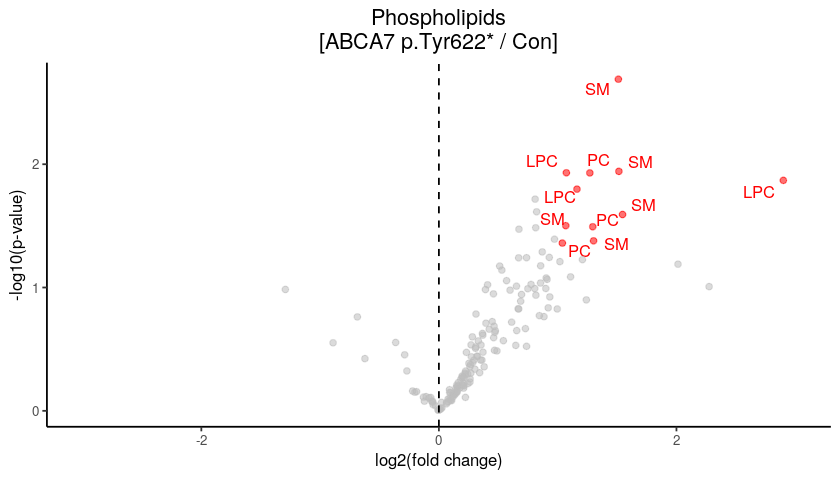

In [298]:
plot_volcano(data[as.character(data$class)%in%c('PC', 'LPC', 'SM', 'PE'),], 'log_ratio.s2.over.s1.', 'p_value.s2.over.s1.', c('PC', 'LPC', 'SM', 'PE'), 0.05, 1, FALSE, 'class', c('chocolate'), 'total_chain_length', 'class')+
ggtitle('Phospholipids\n[ABCA7 p.Tyr622* / Con]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed') + xlim(-3,3)


Warning message:
"Use of `temp$direction` is discouraged. Use `direction` instead."Warning message:
"Removed 4 rows containing missing values (geom_point)."Warning message:
"Removed 4 rows containing missing values (geom_point)."

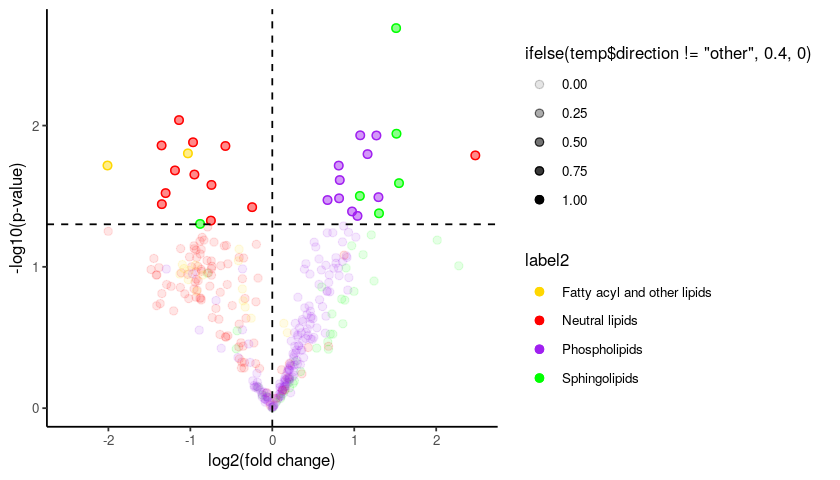

In [151]:


# plot volcano for subclasses

plot_volcano = function(sce, ratio_name, pval_name, pval_cut, lfc_cut, adjust, annotation1, cols){
    temp = as.data.frame(sce[,c(ratio_name, pval_name, annotation1)])
    colnames(temp) = c('log2', 'pvalue', 'label')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    labs = temp$label[temp$direction!='other']
    temp$label2 = ifelse(temp$label%in%labs, temp$label, 'other')#temp$direction!='other' | temp$, temp$label,'other')
    temp$rank = rank(temp$log2)
    temp = temp[temp$label2!='other',]
    p = ggplot(temp, aes(x=log2, y=-log10(pvalue), col=label2))+   scale_color_manual(values = cols) +  geom_point(aes(alpha = ifelse(temp$direction!='other', .4, 0)), size=2) + geom_point(aes(alpha = 1),shape=21,stroke=ifelse(temp$direction=='other', 0, .6), size = 2, show.legend = TRUE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='right')#+facet_grid(label2 ~ . , scales="free", space="free")
#+ #facet_wrap(~label, ncol = 7, scales = "free_x")
    return(p+xlab('log2(fold change)')+ylab('-log10(p-value)'))
}

cols = pal_npg("nrc")(10)
names(cols) = c('DG', 'Cer', 'CL', 'Hex1Cer', 'MG', 'MLCL', 'PC', 'PG', 'PS', 'other')
cols['other'] = 'lightgrey'

cols = c('gold', 'red', 'purple', 'green', 'black')
names(cols) = unique(data$Class)

options(repr.plot.width =7, repr.plot.height = 4)

#pdf('../pdf_figures/major_class_lipid_in.pdf', width=7, height=4)
plot_volcano(data, 'log_ratio.s2.over.s1.', 'p_value.s2.over.s1.',  0.05, 0, FALSE, 'Class', cols) + xlim(-2.5,2.5) + geom_hline(yintercept=-log10(0.05),  linetype='dashed')+ geom_vline(xintercept=0, linetype='dashed')
#dev.off()

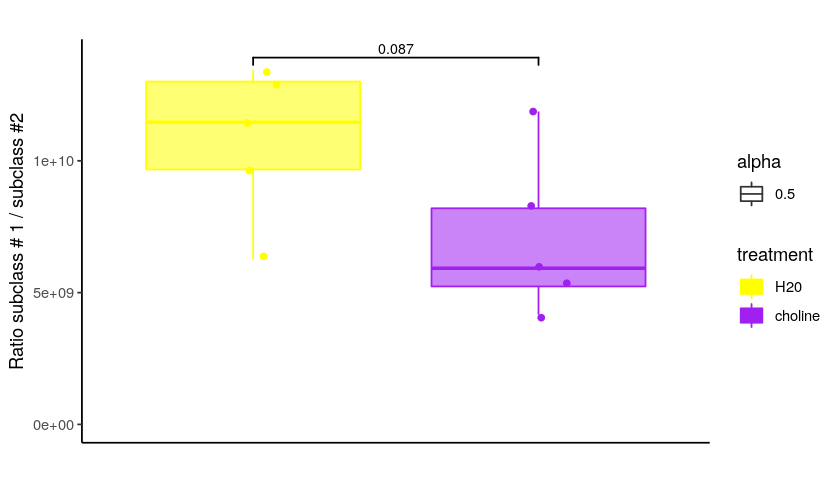

In [245]:
# Define a function to categorize triglycerides based on fatty acid chain length
categorize_triglycerides <- function(data) {
    # Create a new column for triglyceride categories
    data$TG_category <- cut(data$avg_chain_length, 
                            breaks = c(-Inf, 6, 12, 21, Inf), 
                            labels = c("Short-Chain Triglycerides", 
                                       "Medium-Chain Triglycerides (MCTs)", 
                                       "Long-Chain Triglycerides (LCTs)", 
                                       "Very Long-Chain Triglycerides"),
                            right = FALSE)
    return(data)
}

# Apply the categorization function to the data
data_TG_grps <- categorize_triglycerides(data[data$class=='TG',])

# aggregate by class
cts = data[data$class%in%c('TG'), grepl("^area\\.s", names(data))]
cts$class = data_TG_grps$TG_category
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(data_TG_grps$TG_category), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df$treatment <- ifelse(grepl('s2', rownames(df)), 'choline', 'H20')
df$total = total
df <- df[rownames(df) != 'area.s3.1.', ]

# Import the geom_signif function from the ggsignif package
# also show by saturation
library(ggsignif)

cols = c('yellow', 'purple')
names(cols) = c('H20', 'choline')
df$treatment = factor(df$treatment, levels=c('H20', 'choline'))

ggplot(df, aes(x = treatment, y = `Long-Chain Triglycerides (LCTs)`)) +
  geom_boxplot(aes(color=treatment, fill=treatment, alpha=.5)) +
  labs(x = "", y = "Ratio subclass # 1 / subclass #2", title = "") +
  theme_classic() + geom_jitter(aes(color=treatment), width=.1) + scale_y_continuous(limits = c(0, NA)) + 
  geom_signif(comparisons = list(c("H20", "choline")), textsize = 3, test = "t.test", map_signif_level = F) + 
  scale_fill_manual(values = cols)  + scale_color_manual(values = cols) +   theme(
    axis.text.x = element_blank(),  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) 


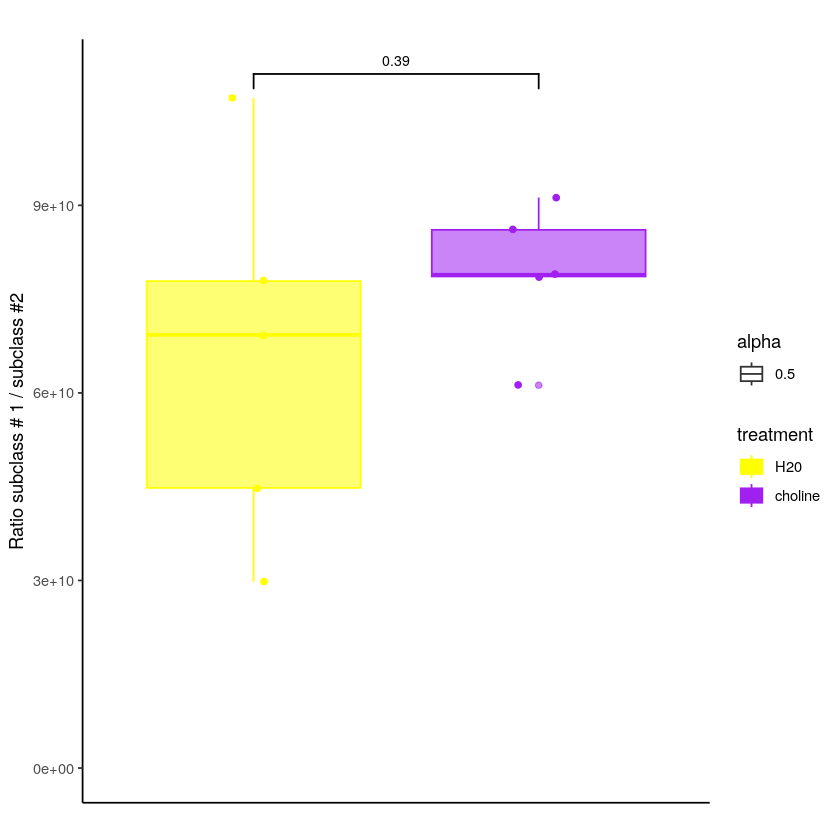

In [7]:
# Define a function to categorize phospholipids based on fatty acid saturation
categorize_phospholipids <- function(data) {
    # Create a new column for phospholipid categories
    data$PL_category <- cut(data$total_unsaturation, 
                            breaks = c(-Inf, 1, 2, Inf), 
                            labels = c("Saturated Phospholipids", 
                                       "Monounsaturated Phospholipids", 
                                       "Polyunsaturated Phospholipids"),
                            right = FALSE)
    
    return(data)
}

data_PL_grps <- categorize_phospholipids(data[data$class%in%c('PC'),])

## aggregate by class
cts = data[data$class%in%c('PC'), grepl("^area\\.s", names(data))]
cts$class = data_PL_grps$PL_category
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(data_PL_grps$PL_category), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df$treatment <- ifelse(grepl('s2', rownames(df)), 'choline', 'H20')
df$total = total
df <- df[rownames(df) != 'area.s3.1.', ]

# Import the geom_signif function from the ggsignif package
# also show by saturation
library(ggsignif)

cols = c('yellow', 'purple')
names(cols) = c('H20', 'choline')
df$treatment = factor(df$treatment, levels=c('H20', 'choline'))

ggplot(df, aes(x = treatment, y = `Monounsaturated Phospholipids`)) +
  geom_boxplot(aes(color=treatment, fill=treatment, alpha=.5)) +
  labs(x = "", y = "Ratio subclass # 1 / subclass #2", title = "") +
  theme_classic() + geom_jitter(aes(color=treatment), width=.1) + scale_y_continuous(limits = c(0, NA)) + 
  geom_signif(comparisons = list(c("H20", "choline")), textsize = 3, test = "t.test", map_signif_level = F) + 
  scale_fill_manual(values = cols)  + scale_color_manual(values = cols) +   theme(
    axis.text.x = element_blank(),  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) 

In [17]:
df$ratio_poly_over_saturated_monouns <- df$`Polyunsaturated Phospholipids` / (df$`Saturated Phospholipids` + df$`Monounsaturated Phospholipids`)
df

,Saturated Phospholipids,Monounsaturated Phospholipids,Polyunsaturated Phospholipids,treatment,total,ratio_poly_over_saturated_monouns
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
area.s1.1.,47195313426,29785631984,13219564530,H20,90200509940,0.1717252
area.s1.2.,72975942132,44807122662,22493488319,H20,140276553113,0.1909739
area.s1.3.,116008133091,107141824020,49794716978,H20,272944674090,0.2231446
area.s1.4.,97344979398,77878920974,35571419142,H20,210795319513,0.2030055
area.s1.5.,114584901191,69272894942,31769771178,H20,215627567312,0.1727953
area.s2.1.,104366893495,78624688218,40559679315,choline,223551261028,0.2216478
area.s2.2.,108201663043,78908721989,38737256282,choline,225847641314,0.2070289
area.s2.3.,104711695946,86078249415,39133290544,choline,229923235905,0.2051119
area.s2.4.,121523085693,91248569566,41182188029,choline,253953843287,0.1935511


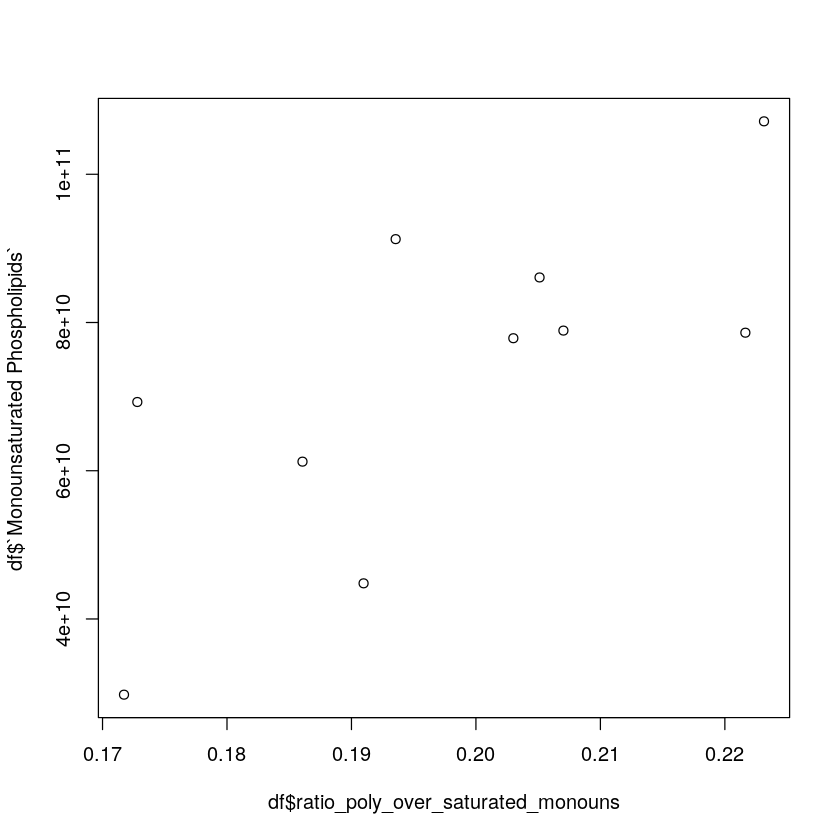

In [18]:
plot(df$ratio_poly_over_saturated_monouns, df$`Monounsaturated Phospholipids`)

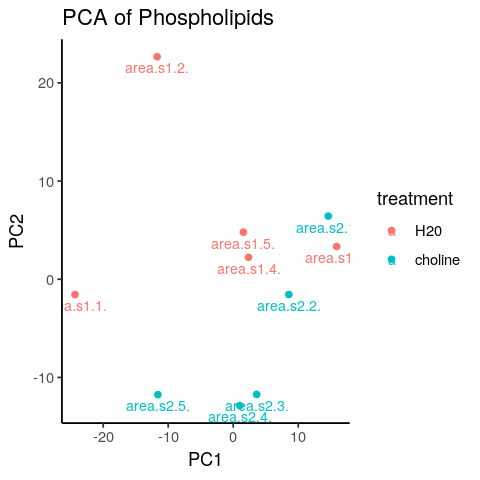

In [35]:
# Perform PCA and plot

# Load necessary libraries
library(ggplot2)

cts_sub = as.data.frame(t(cts[,1:10]))
treatment <- ifelse(grepl('s2', rownames(cts_sub)), 'choline', 'H20')

# Perform PCA
pca_result <- prcomp((cts_sub), scale. = TRUE)

# Create a data frame with PCA results
pca_data <- data.frame(pca_result$x, treatment = treatment)

# Plot PCA
ggplot(pca_data, aes(x = PC1, y = PC2, color = treatment, label = rownames(pca_data))) +
  geom_point() +
  geom_text(vjust = 1.5, size = 3) +
  theme_classic() +
  labs(title = "PCA of Phospholipids", x = "PC1", y = "PC2")

In [34]:
cts_sub

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V339,V340,V341,V342,V343,V344,V345,V346,V347,treatment
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
area.s1.1.,617558632,15907289,53619178,10274987,54283716,113669806,510332166,120440702,62840043,33727264,⋯,359851292,241450520,108841842,41264144,2141434342,81743284,126342617,163292952,177937329,H20
area.s1.2.,2571042645,68107049,294404445,53090544,241232097,404099097,1915516969,344430418,199343877,179018865,⋯,1146434595,832848266,148140437,174309507,3318433868,270598696,443995502,647684263,0,H20
area.s1.3.,1535806786,48579737,234137863,60539426,224524362,603711222,35500460,370962224,358353178,153994301,⋯,620262525,439946087,114889685,109875929,3019095257,102217268,181445829,472943429,856179526,H20
area.s1.4.,1692688478,44130045,170233654,49410124,175182730,332828357,1813200066,280893865,260042991,124868942,⋯,653317288,491436112,99379408,86861353,2532081690,123172334,222870424,493641322,470181029,H20
area.s1.5.,1972576432,50767976,212755436,36717440,177808490,349481744,1728695427,274922737,188198520,166655626,⋯,776655906,561047344,94841580,98415847,2560538723,155437029,263019296,630939132,507467006,H20
area.s2.1.,1680202678,90864343,325088735,105301215,453661603,634703147,2561120934,415597626,291008087,263983056,⋯,821300631,568441775,103139752,62382401,2831531983,172348203,274249067,820748179,1361927167,choline
area.s2.2.,1296568405,52029725,167530763,62857049,237385337,376264722,1548355724,270563268,160888459,164056421,⋯,534021333,370671988,76921556,27253753,2582515223,87147275,145308566,655246148,782411371,choline
area.s2.3.,755996801,34151310,142464088,36483075,161835174,290476195,1210357556,243153065,131960683,105825514,⋯,220345186,158623260,47489209,20554082,1428623065,45511770,71561897,543523216,585906731,choline
area.s2.4.,640344915,26314883,132510614,23927993,99974477,182082037,893461633,220659420,124556152,110859575,⋯,208328276,125954849,24560735,9477769,1706943477,33281452,49863270,338649024,307713350,choline


In [27]:
df$treatment <- ifelse(grepl('s2', rownames(df)), 'choline', 'H20')

Standard deviations (1, .., p=10):
 [1] 3.08766022 0.50191851 0.41033359 0.17919125 0.07749394 0.06460769
 [7] 0.04250744 0.03382390 0.02619248 0.01151449

Rotation (n x k) = (10 x 10):
                 PC1         PC2           PC3         PC4         PC5
area.s1.1. 0.3160971  0.30292579  0.2100517176 -0.70771484 -0.04946399
area.s1.2. 0.3105700  0.12354698  0.6452832153  0.39074666  0.49299751
area.s1.3. 0.3222287  0.16767111  0.0382086957  0.17133313 -0.41699404
area.s1.4. 0.3234082 -0.02815236  0.0939559482  0.10266747 -0.15701846
area.s1.5. 0.3228228  0.09123812  0.1042861616  0.10860822 -0.16376319
area.s2.1. 0.2867761 -0.91735011  0.1371703586 -0.15050704 -0.02855059
area.s2.2. 0.3231551  0.09955490 -0.0003431657 -0.05671803 -0.31489911
area.s2.3. 0.3184492 -0.01367930 -0.4126633136  0.30581633 -0.21457555
area.s2.4. 0.3166833  0.05894092 -0.4891631040  0.19490008  0.43429920
area.s2.5. 0.3203469  0.02525872 -0.2998953852 -0.37065670  0.44103798
                   PC6         PC

In [24]:
pca_data

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.29957131,-0.012356709,0.096621413,0.0328854488,-0.0114928665,-0.035075984,6.762006e-04,-2.822158e-02,9.054260e-03,0.0045753539,Cer
-0.61305182,0.042742333,0.025290967,-0.0210630392,0.0083060358,-0.008931483,1.375022e-03,3.356469e-04,-1.135662e-03,-0.0010850574,Cer
-0.57867352,0.030903598,0.027054468,-0.0144314568,0.0076181676,-0.008497824,6.020583e-04,8.370160e-04,8.710564e-05,-0.0036680856,Cer
-0.61279146,0.041413190,0.024788257,-0.0211601339,0.0072430656,-0.008574877,2.153468e-03,1.304027e-03,-1.410368e-03,-0.0006212820,Cer
-0.57589705,0.020208552,0.027114508,-0.0179413783,0.0029320245,-0.007931607,-2.572246e-04,3.808290e-03,-3.834406e-03,-0.0019400074,Cer
-0.53667179,0.014955064,0.026450291,-0.0119316414,-0.0059193405,-0.005825728,6.824875e-03,6.133606e-03,-1.820615e-03,-0.0087793613,Cer
-0.28543893,-0.105094266,0.033804684,0.0053735366,0.0177617462,-0.038610852,-4.352075e-02,-5.640304e-02,-3.885573e-02,0.0534354357,Cer
-0.55414974,0.028874867,0.020715594,-0.0147252578,0.0059848008,-0.006189371,3.061857e-03,9.063077e-04,-1.159017e-03,-0.0028693396,Cer
-0.57759365,0.034103071,0.025369641,-0.0148927194,0.0005307619,-0.006402263,8.632446e-03,5.743851e-04,4.894688e-03,-0.0012173794,Cer


In [12]:
cts = data[, grepl("^area\\.s", names(data))]
cts$class = data$class
result <- aggregate(. ~ class, data = cts, sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df$treatment <- ifelse(grepl('s2', rownames(df)), 'choline', 'H20')
df$total = total
df <- df[rownames(df) != 'area.s3.1.', ]


In [18]:
df$treatment = ifelse(df$treatment=='H20', 'H20', '+ CDP-Choline')

df$treatment = factor(df$treatment, levels=c('H20', '+ CDP-Choline'))
df

,Cer,CerP,DG,Hex1Cer,Hex2Cer,Hex3Cer,LPC,LPE,LPI,LPS,⋯,PI,PS,SM,SPH,SPHP,TG,WE,ZyE,treatment,total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
area.s1.1.,1717819559,254729639,139029778760,53541220,18134800,50075176,6462485304,3084405276,32783015,37733733,⋯,333011609,280239979,1753039613,2437876838,1841574,10610809891,9164264908,341230282,H20,6.350791e+11
area.s1.2.,6762523436,1157037963,322649590279,169772726,34855508,230033298,10913683187,5339342918,70174847,96709774,⋯,689213088,630729584,4479500126,4802409652,2995060,21624739190,17433837184,647684263,H20,1.107845e+12
area.s1.3.,4214827678,552687580,193696274398,434988776,121651277,348998030,29269707345,15564787626,83369485,140732390,⋯,1822693417,1844484001,7700644290,3423444992,22009554,17569383950,13107404994,1329122954,H20,1.076706e+12
area.s1.4.,5476946726,633208394,168697519049,337706532,103418439,280130759,22334056778,9024466456,77979538,162736398,⋯,1214710427,1388088799,7336610904,3212012116,15753468,15481400044,11842983459,963822350,H20,8.655100e+11
area.s1.5.,5611287683,1032392706,169163224456,276485175,105510852,304047210,22590148115,8946081633,124574811,287425171,⋯,1020960080,1262123590,8217176314,3786064259,18159950,13576220710,12661455926,1138406138,H20,9.104406e+11
area.s2.1.,7698830086,1417959046,176878464322,529752132,252464536,759063208,30723293850,11623086339,165949080,326246099,⋯,1288654119,1395019241,21468612590,3999869092,19727671,16101035307,13818704818,2182675346,+ CDP-Choline,8.639972e+11
area.s2.2.,5086497236,997732924,148558579238,360182751,165349982,457950046,31771254242,9182448287,156066218,305677414,⋯,1244766903,1592646068,14049896024,2842419935,14679138,11727066155,11595194798,1437657519,+ CDP-Choline,9.134623e+11
area.s2.3.,3720376811,645058753,92657866031,314164177,96440448,311794935,26962898612,7627109474,98341402,240666175,⋯,1195343862,1755813120,9515468422,1725456360,10909247,7892068304,6432662444,1129429947,+ CDP-Choline,6.683286e+11
area.s2.4.,2838507459,644088493,86185143883,175605005,62012844,172145928,27541228519,5620789413,105664560,223557811,⋯,873621758,1561465856,7212152930,1150280278,10539209,7184383812,7091394228,646362374,+ CDP-Choline,7.125982e+11


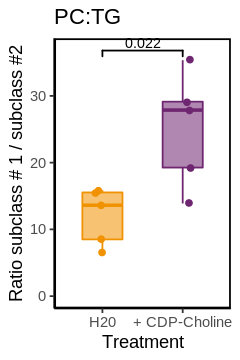

In [26]:
# Import the geom_signif function from the ggsignif package
# also show by saturation
library(ggsignif)

cols = c('#F19200', '#6F2670')
names(cols) = c('H20', '+ CDP-Choline')
df$treatment = ifelse(df$treatment=='H20', 'H20', '+ CDP-Choline')

df$treatment = factor(df$treatment, levels=c('H20', '+ CDP-Choline'))
options(repr.plot.width =2, repr.plot.height = 3)

ggplot(df, aes(x = treatment, y = PC/TG)) +
  geom_boxplot(aes(color=treatment, fill=treatment, alpha=.5), width=.5) +
  labs(x = "Treatment", y = "Ratio subclass # 1 / subclass #2", title = "PC:TG") +
  theme_classic() + geom_jitter(aes(color=treatment), width=.1) + scale_y_continuous(limits = c(0, NA)) + 
  geom_signif(comparisons = list(c("H20", "+ CDP-Choline")), textsize = 3, test = "t.test", map_signif_level = F) + 
  scale_fill_manual(values = cols)  + scale_color_manual(values = cols) +   theme(
    strip.background = element_rect(fill = "white", color = NA),
    legend.position = "none",
    panel.border = element_rect(color = "black", fill = NA, size = 1))  # Add box around plot
ggsave("../../pdf_figures/pc_tg.png", plot = last_plot(), device = "png", width = 2, height = 3)


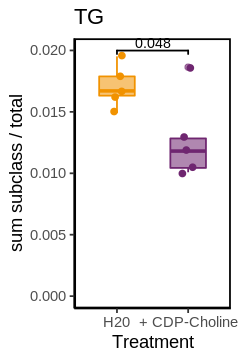

In [39]:
# Import the geom_signif function from the ggsignif package
# also show by saturation
library(ggsignif)

cols = c('#F19200', '#6F2670')
names(cols) = c('H20', '+ CDP-Choline')
df$treatment = ifelse(df$treatment=='H20', 'H20', '+ CDP-Choline')

df$treatment = factor(df$treatment, levels=c('H20', '+ CDP-Choline'))
options(repr.plot.width =2, repr.plot.height = 3)

ggplot(df, aes(x = treatment, y = TG/total)) +
  geom_boxplot(aes(color=treatment, fill=treatment, alpha=.5), width=.5) +
  labs(x = "Treatment", y = "sum subclass / total", title = "TG") +
  theme_classic() + geom_jitter(aes(color=treatment), width=.1) + scale_y_continuous(limits = c(0, NA)) + 
  geom_signif(comparisons = list(c("H20", "+ CDP-Choline")), textsize = 3, test = "t.test", map_signif_level = F) + 
  scale_fill_manual(values = cols)  + scale_color_manual(values = cols) +   theme(
    strip.background = element_rect(fill = "white", color = NA),
    legend.position = "none",
    panel.border = element_rect(color = "black", fill = NA, size = 1))  # Add box around plot
ggsave("../../pdf_figures/tg_total.png", plot = last_plot(), device = "png", width = 2, height = 3)



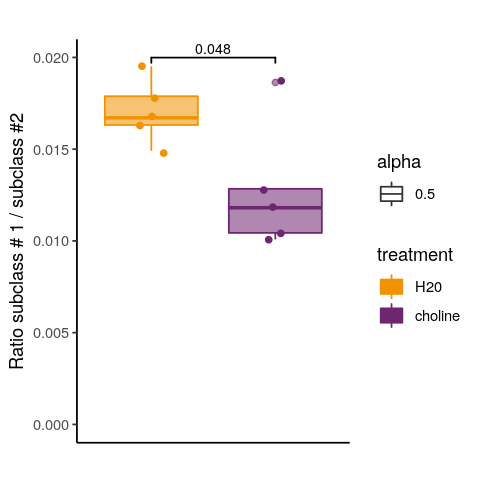

In [36]:

cols = c('#F19200', '#6F2670')
names(cols) = c('H20', 'choline')
df$treatment = factor(df$treatment, levels=c('H20', 'choline'))

ggplot(df, aes(x = treatment, y = TG/total)) +
  geom_boxplot(aes(color=treatment, fill=treatment, alpha=.5)) +
  labs(x = "", y = "Ratio subclass # 1 / subclass #2", title = "") +
  theme_classic() + geom_jitter(aes(color=treatment), width=.1) + scale_y_continuous(limits = c(0, NA)) + 
  geom_signif(comparisons = list(c("H20", "choline")), textsize = 3, test = "t.test", map_signif_level = F) + 
  scale_fill_manual(values = cols)  + scale_color_manual(values = cols) +   theme(
    axis.text.x = element_blank(),  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) 


Warning message:
"Removed 3 rows containing missing values (geom_text_repel)."Warning message:
"Removed 3 rows containing missing values (geom_point)."

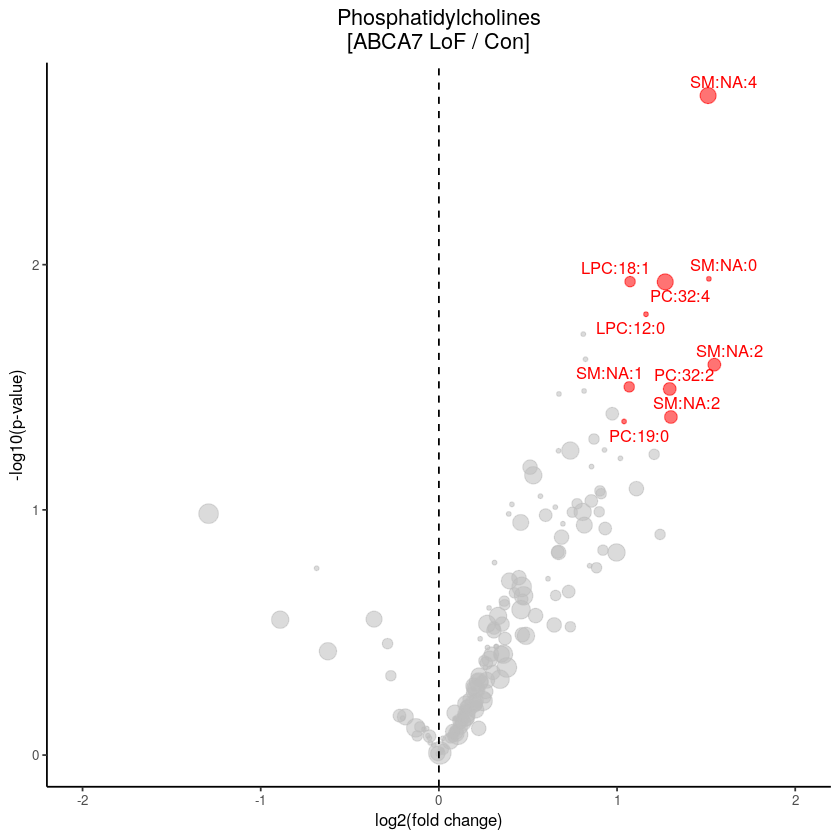

In [136]:
plot_volcano(subset(data, class %in% c('PC', 'LPC', 'SM', 'PE')), 'log_ratio.s2.over.s1.', 'p_value.s2.over.s1.', c('PC', 'LPC', 'SM', 'PE'), 0.05, 1, FALSE, 'class', c('chocolate'), 'total_unsaturation', 'combined_class2')+
ggtitle('Phosphatidylcholines\n[ABCA7 LoF / Con]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed') + xlim(-2,2)

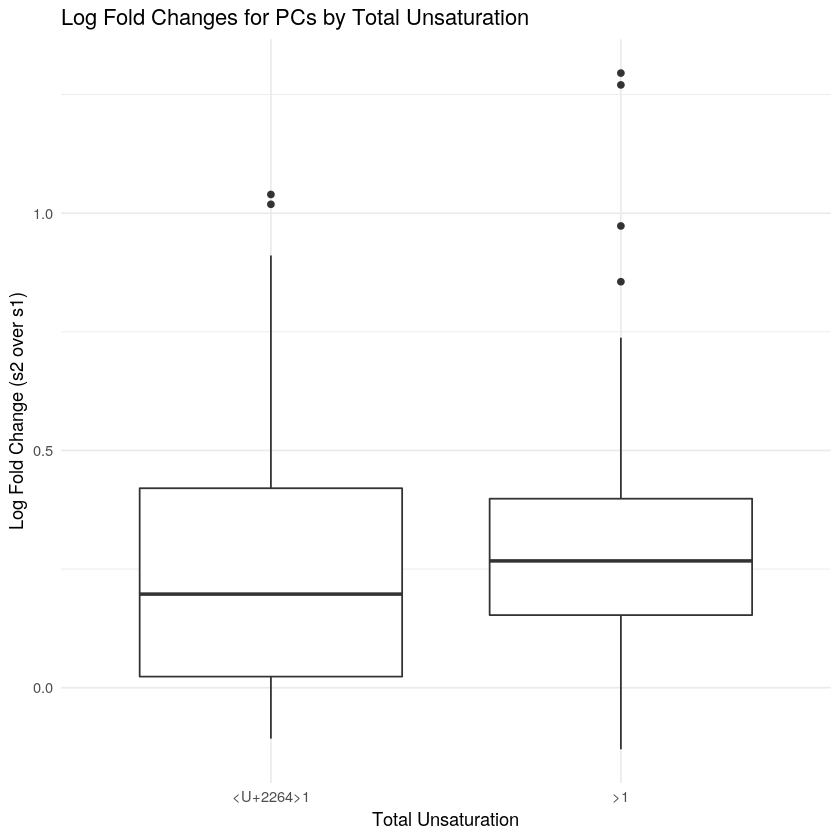

In [106]:
# Binarize total_unsaturation into categories <=1 and >1
data_pc <- subset(data, class == "PC")
data_pc$unsaturation_bin <- ifelse(data_pc$total_unsaturation <= 1, "≤1", ">1")

# Plot boxplot of log fold changes for PCs by total unsaturation bin
ggplot(data_pc, aes(x = unsaturation_bin, y = log_ratio.s2.over.s1.)) +
    geom_boxplot() +
    xlab("Total Unsaturation") +
    ylab("Log Fold Change (s2 over s1)") +
    ggtitle("Log Fold Changes for PCs by Total Unsaturation") +
    theme_minimal()


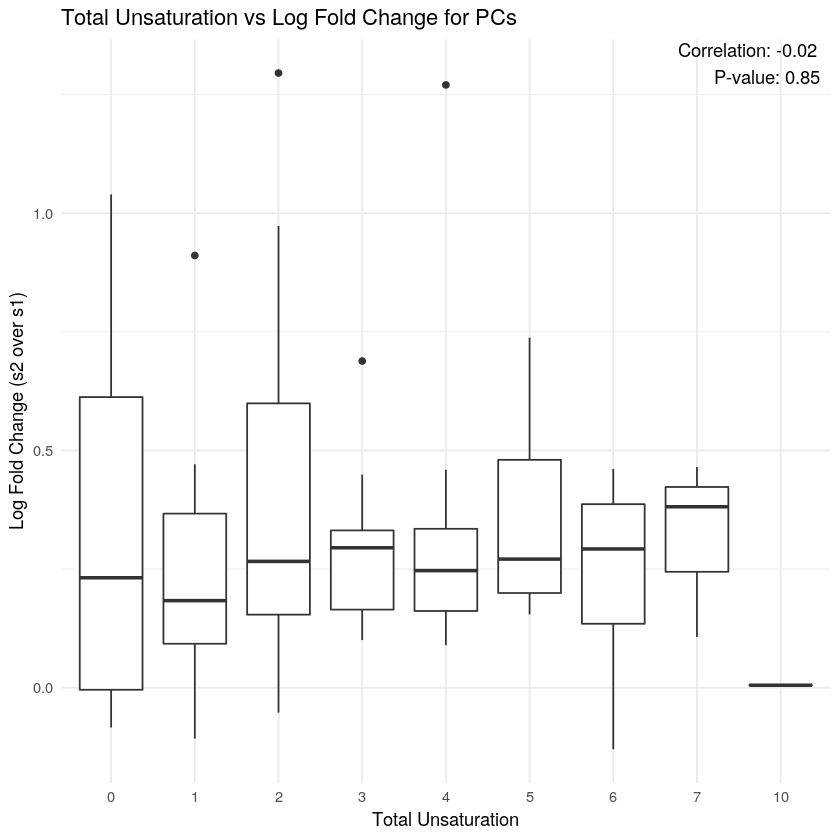

In [103]:
cor_test <- cor.test(subset(data, class == "PC")$log_ratio.s2.over.s1., subset(data, class == "PC")$total_unsaturation)

cor_label <- paste0("Correlation: ", round(cor_test$estimate, 2), "\nP-value: ", signif(cor_test$p.value, 2))

ggplot(subset(data, class == "PC"), aes(y = log_ratio.s2.over.s1., x = as.factor(total_unsaturation))) +
    geom_boxplot() +
    xlab("Total Unsaturation") +
    ylab("Log Fold Change (s2 over s1)") +
    ggtitle("Total Unsaturation vs Log Fold Change for PCs") +
    theme_minimal() +
    annotate("text", x = Inf, y = Inf, label = cor_label, hjust = 1.1, vjust = 1.1)


In [66]:
data[data$class%in%c('MG') & data$log_ratio.s2.over.s1.<0 & data$p_value.s2.over.s1.<0.1,]

,name,ret_time,rej.,lipidion,lipidgroup,class,fattyacid,fa1,fa2,fa3,⋯,peakdatapoint.s2.5.,peakdatapoint.s3.1.,X,avg_blank,ratio.s2.over.s1.,log_ratio.s2.over.s1.,p_value.s2.over.s1.,log_p_value.s2.over.s1.,avg_chain_length,total_chain_length
,<fct>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116,MG(12:0)+H_25.39,25.39,0,MG(12:0)+H,MG(12:0)+H,MG,(12:0),(12:0),,,⋯,98,48,NA,149295.26,0.6867986,-0.5420409,0.09513738,1.021649,4.000000,12
117,MG(13:0)+NH4_26.42,26.42,0,MG(13:0)+NH4,MG(13:0)+NH4,MG,(13:0),(13:0),,,⋯,84,84,NA,1128976.33,0.5948902,-0.7493046,0.04705106,1.327431,4.333333,13
119,MG(14:0)+H_28.47,28.47,0,MG(14:0)+H,MG(14:0)+H,MG,(14:0),(14:0),,,⋯,186,46,NA,1215957.34,0.6469586,-0.6282548,0.09806684,1.008478,4.666667,14
121,MG(15:0)+H_19.5,19.50,0,MG(15:0)+H,MG(15:0)+H,MG,(15:0),(15:0),,,⋯,29,51,NA,71118.04,0.3920303,-1.3509629,0.01382702,1.859271,5.000000,15
125,MG(17:0)+NH4_32.35,32.35,0,MG(17:0)+NH4,MG(17:0)+NH4,MG,(17:0),(17:0),,,⋯,105,74,NA,899827.33,0.5273708,-0.9231104,0.08585145,1.066252,5.666667,17
127,MG(18:0)+NH4_33.76,33.76,0,MG(18:0)+NH4,MG(18:0)+NH4,MG,(18:0),(18:0),,,⋯,87,194,NA,49658483.80,0.5978250,-0.7422048,0.02631104,1.579862,6.000000,18
129,MG(18:1)+NH4_32.55,32.55,0,MG(18:1)+NH4,MG(18:1)+NH4,MG,(18:1),(18:1),,,⋯,156,96,NA,4202567.93,0.5758210,-0.7963077,0.09018658,1.044858,6.000000,18
132,MG(18:2e)+H_32.89,32.89,0,MG(18:2e)+H,MG(18:2e)+H,MG,(18:2e),(18:2e),,,⋯,287,283,NA,17270654.34,0.7559513,-0.4036347,0.08581217,1.066451,6.000000,18
134,MG(18:3e)+H_32.36,32.36,0,MG(18:3e)+H,MG(18:3e)+H,MG,(18:3e),(18:3e),,,⋯,84,82,NA,1425327.11,0.6000037,-0.7369567,0.09910136,1.003920,6.000000,18


Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in mean(as.numeric(chains)):
"NAs introduced by coe

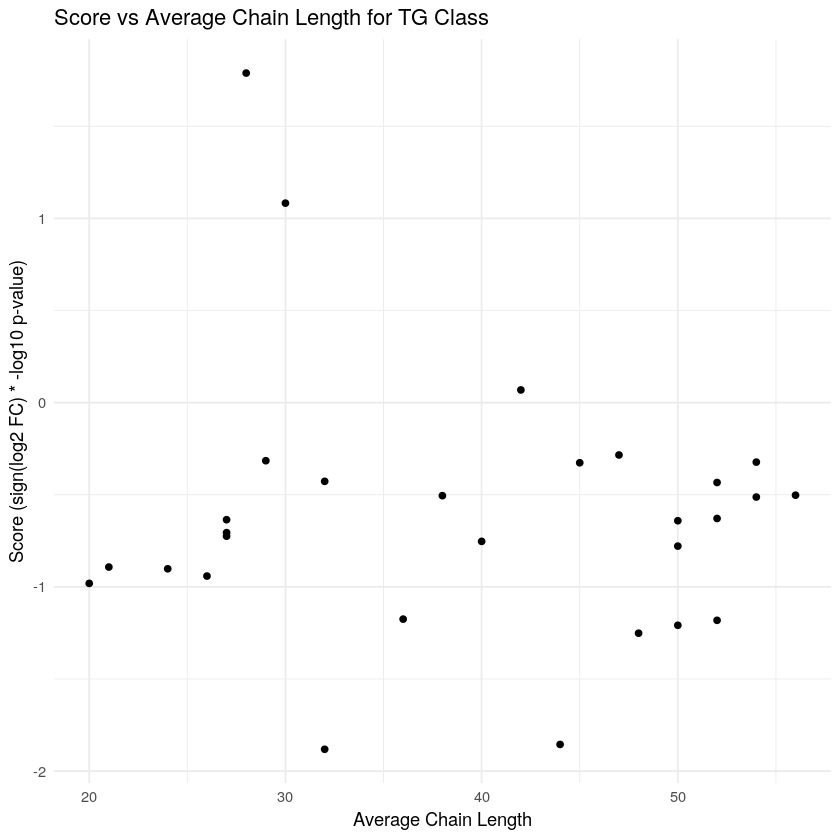

In [63]:
# Calculate the score as sign of log fold change multiplied by -log10 p-value
data_tg <- subset(data, class %in% c('TG'))
data_tg$score <- sign(data_tg$log_ratio.s2.over.s1.) * -log10(data_tg$p_value.s2.over.s1.)

# Plot score against average chain length
ggplot(data_tg, aes(x = total_chain_length, y = score)) +
    geom_point() +
    xlab("Average Chain Length") +
    ylab("Score (sign(log2 FC) * -log10 p-value)") +
    ggtitle("Score vs Average Chain Length for TG Class") +
    theme_minimal()

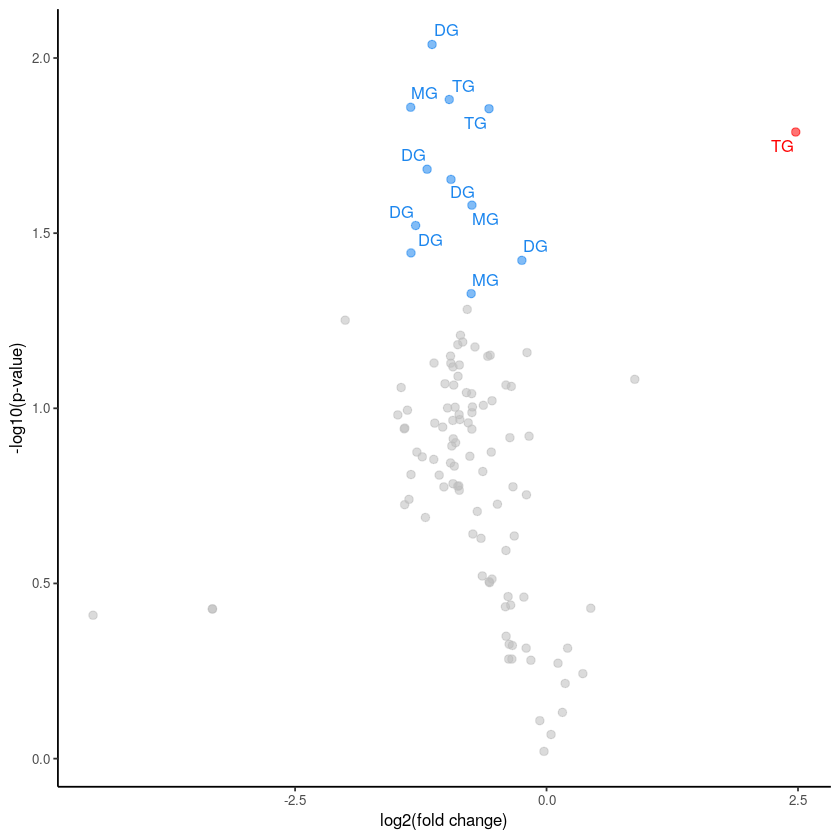

In [45]:
v2b

In [ ]:
v2b = plot_volcano(data$ngn2_all[rowData(data$ngn2_all)$lipid.class%in%c('TG'),], 'logfc_both_batch', 'pvals_both_batch', c('TG'), 0.05, 2, FALSE, 'lipid.class', c('chocolate'))
v1a = v1a +ggtitle('Phosphatidylcholines\n[ABCA7 LoF / Con]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed')